# The Porto Seguro kaggle challenge

## 1. Data Description

In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., `ind` , `reg`, `car`, `calc`). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

## 2. File descriptions

- `train.csv` contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
- `test.csv` contains the test data.

## 3. Aim

- Build a classifier using the training dataset that leads to a good ROC and Precision / Recall curve on the testing set
- The notebook should describe your steps, explain what you do and should run entirely without bugs. It should contain some descriptive statistics and quick study, to understand some things about the data...
- It must end with plots of the ROC and precision/recall curves obtained on the testing dataset

<a id='toc'></a>
# Sommaire

I. [Analyse exploratoire des données](#eda)<br>
1) [Etude des données brutes](#edb)<br>
a) [Importation des données](#imp)<br>
b) [Analyse descriptive des données](#add)<br>
c) [Types des données](#typd)<br>
d) [Valeurs manquantes](#vm)<br>
e) [Distribution de la variable cible](#dvc)<br>

[II.Préparation des données pour l'entraînement des classifieurs ](#preprocess)<br>
[III.Entraînement et Tests](#traintest)<br>

<a id='eda'></a>
# I. Analyse exploratoire des données

<a id='edb'></a>
## 1)	Etude des données brutes

<a id='imp'></a>
### a) Importation des données

In [53]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
#from sklearn.impute import SimpleImputer



# Use the path to your filename

#Importation locale

#Chemin Kenny
#path = ''

#Chemin Mickaël
#path = '/home/chopin/Bureau/M2MOdata/machine_learning/tp2challenge'

#df = pd.read_csv(os.path.join(path, 'train.csv'))
#df_test = pd.read_csv(os.path.join(path, 'test.csv'))

#Importation kaggle

df = pd.read_csv("../input/data/train.csv")
df_test = pd.read_csv("../input/data/test.csv")

<a id='add'></a>
### b) Analyse descriptive des données

In [54]:
df.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [56]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [58]:
df_test.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,8.928160e+05,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.00000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,7.441535e+05,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,0.000373,0.001595,0.009376,0.001039,0.012383,7.296862,0.660591,0.120399,0.154973,0.611057,0.439868,0.551740,8.292038,0.82994,-0.504895,0.725798,-0.158449,6.564297,0.910144,0.832311,1.327911,0.992134,62.284293,2.346606,0.379957,0.813637,0.276431,3.068325,0.449632,0.450453,0.450054,2.371390,1.885328,7.687805,3.009537,9.225854,2.338538,8.443167,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,4.296830e+05,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,0.019309,0.039905,0.096375,0.032223,0.127251,3.541948,0.473509,0.325428,0.361879,0.287699,0.404678,0.794023,2.508331,0.37570,0.788753,2.154886,0.844566,5.500485,0.347283,0.373590,0.978741,0.091530,33.003714,0.831666,0.058385,0.224779,0.356835,0.729005,0.287213,0.287373,0.287254,1.116953,1.136763,1.333521,1.415155,1.460560,1.248601,2.906361,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,0.141421,0.275778,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720218e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.524404,7.000000,1.00000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.671234,0.333916,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.443070e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.721110,7.000000,1.00000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.7660

In [59]:
lignes = df.shape[0]
colonnes = df.shape[1]
print("Le jeu de données de training contient {0} lignes et {1} colonnes".format(lignes, colonnes))

Le jeu de données de training contient 595212 lignes et 59 colonnes


In [60]:
lignes_t = df_test.shape[0]
colonnes_t = df_test.shape[1]
print("Le jeu de données de test contient {0} lignes et {1} colonnes".format(lignes_t, colonnes_t))

Le jeu de données de test contient 892816 lignes et 58 colonnes


<a id='typd'></a>
### c) Type des données

In [61]:
bin_featnames = []
cat_featnames = []
cont_featnames = []
ord_featnames = []
t=[]

for s in df.columns:
    if "ps_" in s:
        #print(s[3:])
        u=s[s.find("ps_")+3:]
        v=u.find("_")
        w=u[:v]
        t.append(w)
        
    if 'cat' in s:
        cat_featnames.append(s)
        
    if 'bin' in s:
        bin_featnames.append(s)
        
    if ('bin' not in s) & ('cat' not in s) & (s in df.dtypes[df.dtypes=='int64']) & (s not in ['target', 'id']):
        ord_featnames.append(s)
        
    if ('bin' not in s) & ('cat' not in s) & (s in df.dtypes[df.dtypes=='float64']):
        cont_featnames.append(s)

featgroups=sorted(dict(Counter(t)), key=dict(Counter(t)).get, reverse=True)

print("Il y a quatre groupes de features :\n")
print(featgroups)

Il y a quatre groupes de features :

['calc', 'ind', 'car', 'reg']


In [62]:
print("Et dans ces groupes, on retrouve quatre types de données \n")

print("Les" + str(len(bin_featnames)) + "features binaires sont :\n")
for x in bin_featnames:
    print("- "+x)
print("\n")

print("Les" + str(len(bin_featnames)) + "features catégorielles sont :\n")
for x in cat_featnames:
    print("- "+x)
print("\n")

print("Les features continues sont :\n")
for x in cont_featnames:
    print("- "+x)
print("\n")

print("Les features ordinales sont :\n")
for x in ord_featnames:
    print("- "+x)

Et dans ces groupes, on retrouve quatre types de données 

Les17features binaires sont :

- ps_ind_06_bin
- ps_ind_07_bin
- ps_ind_08_bin
- ps_ind_09_bin
- ps_ind_10_bin
- ps_ind_11_bin
- ps_ind_12_bin
- ps_ind_13_bin
- ps_ind_16_bin
- ps_ind_17_bin
- ps_ind_18_bin
- ps_calc_15_bin
- ps_calc_16_bin
- ps_calc_17_bin
- ps_calc_18_bin
- ps_calc_19_bin
- ps_calc_20_bin


Les17features catégorielles sont :

- ps_ind_02_cat
- ps_ind_04_cat
- ps_ind_05_cat
- ps_car_01_cat
- ps_car_02_cat
- ps_car_03_cat
- ps_car_04_cat
- ps_car_05_cat
- ps_car_06_cat
- ps_car_07_cat
- ps_car_08_cat
- ps_car_09_cat
- ps_car_10_cat
- ps_car_11_cat


Les features continues sont :

- ps_reg_01
- ps_reg_02
- ps_reg_03
- ps_car_12
- ps_car_13
- ps_car_14
- ps_car_15
- ps_calc_01
- ps_calc_02
- ps_calc_03


Les features ordinales sont :

- ps_ind_01
- ps_ind_03
- ps_ind_14
- ps_ind_15
- ps_car_11
- ps_calc_04
- ps_calc_05
- ps_calc_06
- ps_calc_07
- ps_calc_08
- ps_calc_09
- ps_calc_10
- ps_calc_11
- ps_calc_12
- ps

<a id='vm'></a>
### d) Valeurs manquantes
[Retourner au sommaire](#toc)<br>

In [63]:
Nombre_de_donnees_manquantes=df.isna().sum()
Nombre_de_donnees_manquantes

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


Aucune donnée manquante n'a été détectée ici. Il n'y a donc que celles qui ont codées par la valeur -1. On relève donc les données manquantes en changeant les -1 en NaN et via le test isna()

In [64]:
donnees=df.replace(-1, np.NaN)
donnees_test=df_test.replace(-1, np.NaN)

In [65]:
Nombre_de_donnees_manquantes=donnees.isna().sum()
Nombre_de_donnees_manquantes

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [66]:
Nombre_de_donnees_test_manquantes=donnees_test.isna().sum()
Nombre_de_donnees_test_manquantes

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


Faisons une liste des features ayant des données manquantes :

In [67]:
val_manquantes=donnees.columns[donnees.isna().any()].tolist()
val_manquantes

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [68]:
val_test_manquantes=donnees_test.columns[donnees_test.isna().any()].tolist()
val_test_manquantes

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_14']

Visualisons les données manquantes :

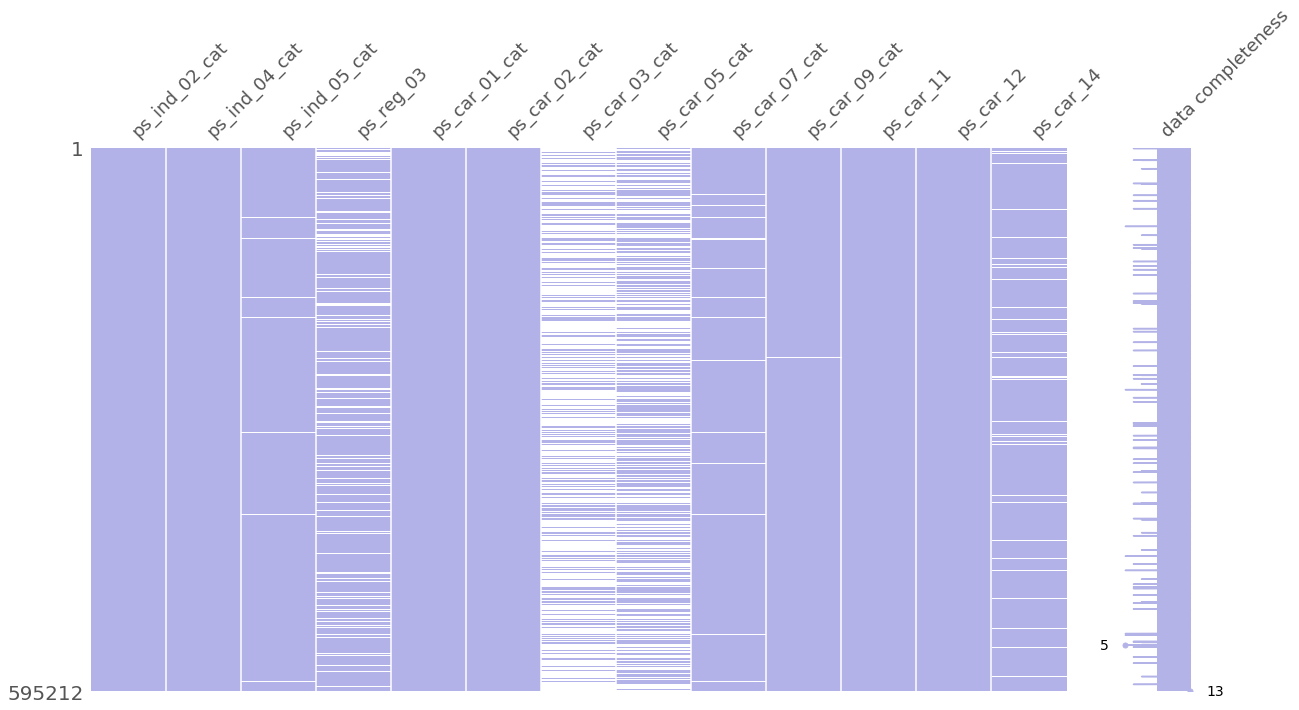

In [69]:
import missingno as msno
msno.matrix(donnees[val_manquantes],width_ratios=(10,1),figsize=(20,10),color=(0.7,0.7,0.91),fontsize=18,\
            sparkline=True,labels=True)

Calculons les pourcentages de données manquantes :

In [70]:
donnees_copy = (Nombre_de_donnees_manquantes / len(donnees)) * 100 
donnees_copy = donnees_copy.drop(donnees_copy[donnees_copy == 0].index).sort_values(ascending=False)[:30]
# Rajouter une colonne avec le nombre de NaN avec pd.concat
manquantes = pd.DataFrame({'Données manquantes en %' :donnees_copy})
manquantes

,Données manquantes en %
ps_car_03_cat,69.089837
ps_car_05_cat,44.782531
ps_reg_03,18.106490
ps_car_14,7.160474
ps_car_07_cat,1.930237
ps_ind_05_cat,0.975955
ps_car_09_cat,0.095596
ps_ind_02_cat,0.036290
ps_car_01_cat,0.017977
ps_ind_04_cat,0.013945


In [71]:
donnees_test_copy = (Nombre_de_donnees_test_manquantes / len(donnees_test)) * 100 
donnees_test_copy = donnees_test_copy.drop(donnees_test_copy[donnees_test_copy == 0].index).sort_values(ascending=False)[:30]
# Rajouter une colonne avec le nombre de NaN avec pd.concat
manquantes_test = pd.DataFrame({'Données test manquantes en %' :donnees_test_copy})
manquantes_test

,Données test manquantes en %
ps_car_03_cat,69.097216
ps_car_05_cat,44.842274
ps_reg_03,18.109442
ps_car_14,7.146489
ps_car_07_cat,1.941161
ps_ind_05_cat,0.975565
ps_car_09_cat,0.098229
ps_ind_02_cat,0.034386
ps_car_01_cat,0.017921
ps_ind_04_cat,0.016241


<a id='dvc'></a>
### Distribution de la variable cible

In [72]:
#target=donnees.pop("target")
target = donnees.target
#type(target)
#target

In [73]:
target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [74]:
print("La pourcentage de déclaration de sinistre est : " + str(np.mean(donnees["target"])))

La pourcentage de déclaration de sinistre est : 0.036447517859182946


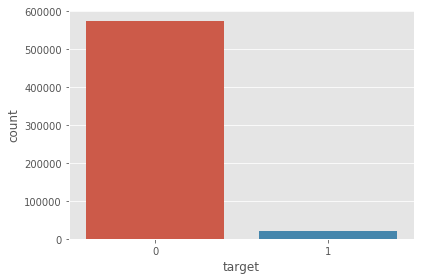

In [75]:
plt.style.use('ggplot')
sns.despine(left=True)
ax=sns.countplot(x=target, data=donnees)

plt.tight_layout()

Il n'y a que 3.6% de déclaration de sinistres. On voir donc que le jeu de données est très déséquilibré. C'est surement la raison de cette compétition Kaggle. En effet, si la valeur 1 est aussi sous-représentée, il devient difficle de la prédire. Le but est alors soit de mieux prédire les futures déclarations de sinistres soit de détecter de la fraude.

Pour effectuer de bonnes prédictions malgré ce déséquilibre on peut sous-échantillonner les données de la classe dominante, sur-échantillonner les données de la classe minoritaire ou bien encore stratifier les données lors de la cross-validation.

## 2) Visualisation `pandas` + `seaborn` du jeu de données
[Retourner au sommaire](#toc)<br>

### a) 	Corrélation des features selon leur type

In [76]:
def correlation_features(titre, colonnes, dataframe):
    colormap = plt.cm.inferno
    plt.figure(figsize=(16,12))
    plt.title('Corrélation des features ' + titre + '\n', y=1, fontsize= 16)
    sns.heatmap(dataframe[colonnes].corr(), cmap=colormap, annot=True)

#### Corrélation des features binaires

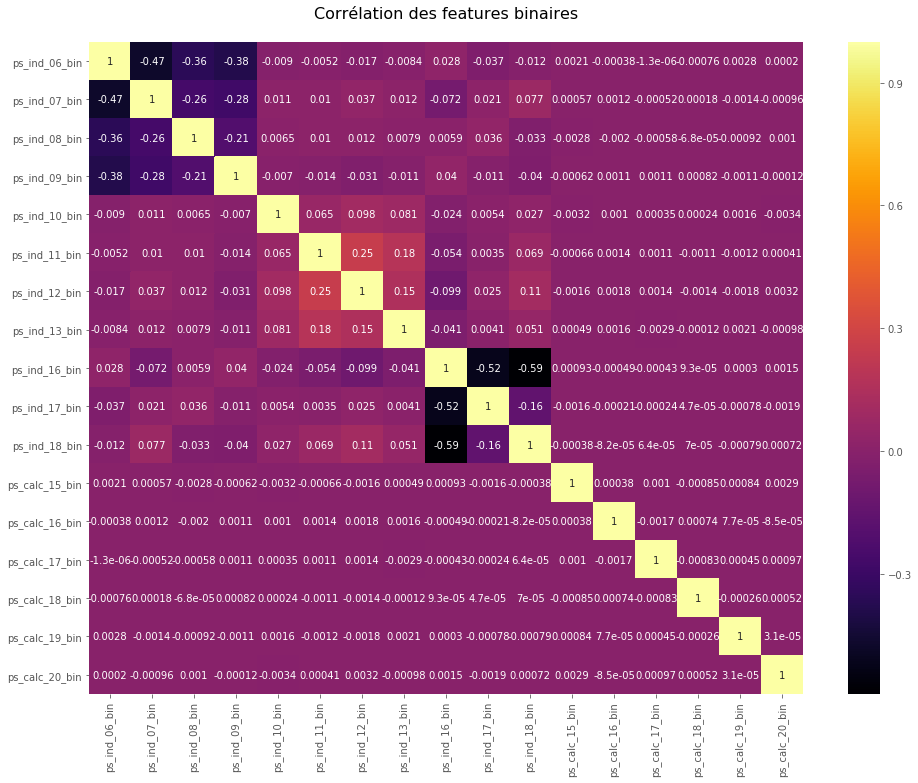

In [77]:
correlation_features('binaires', bin_featnames, donnees)

Observation

#### Corrélation des features catégorielles

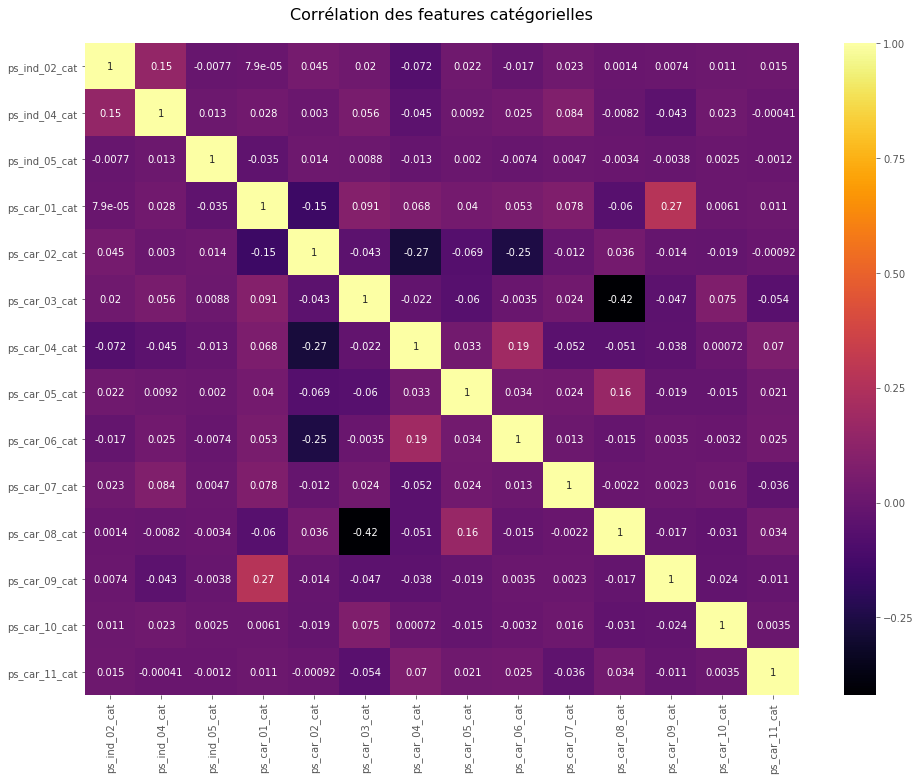

In [78]:
correlation_features('catégorielles', cat_featnames,donnees)

Observation

#### Corrélation des features continues

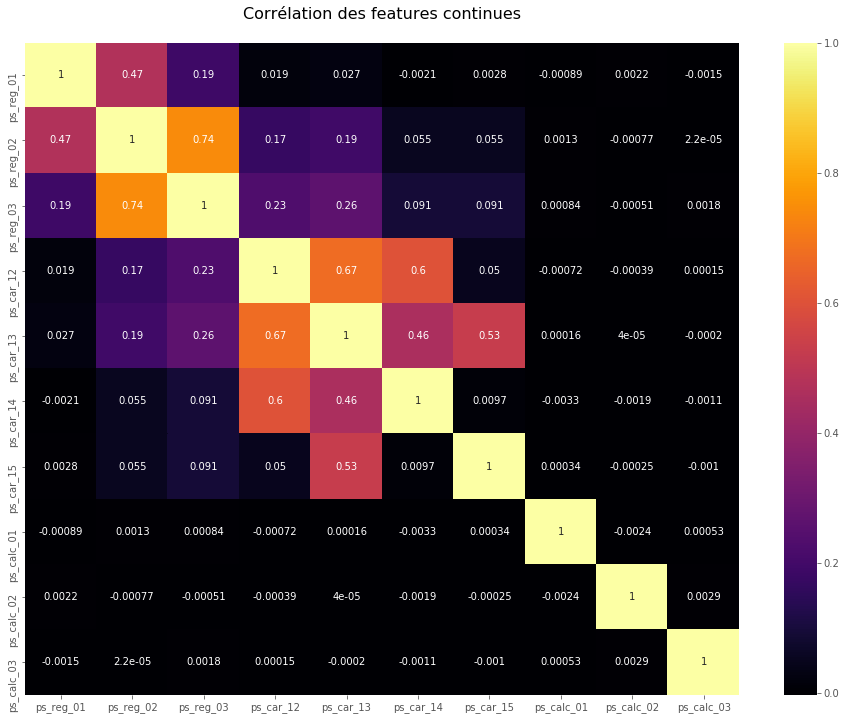

In [79]:
correlation_features('continues', cont_featnames,donnees)

Observation

#### Corrélation des features ordinales

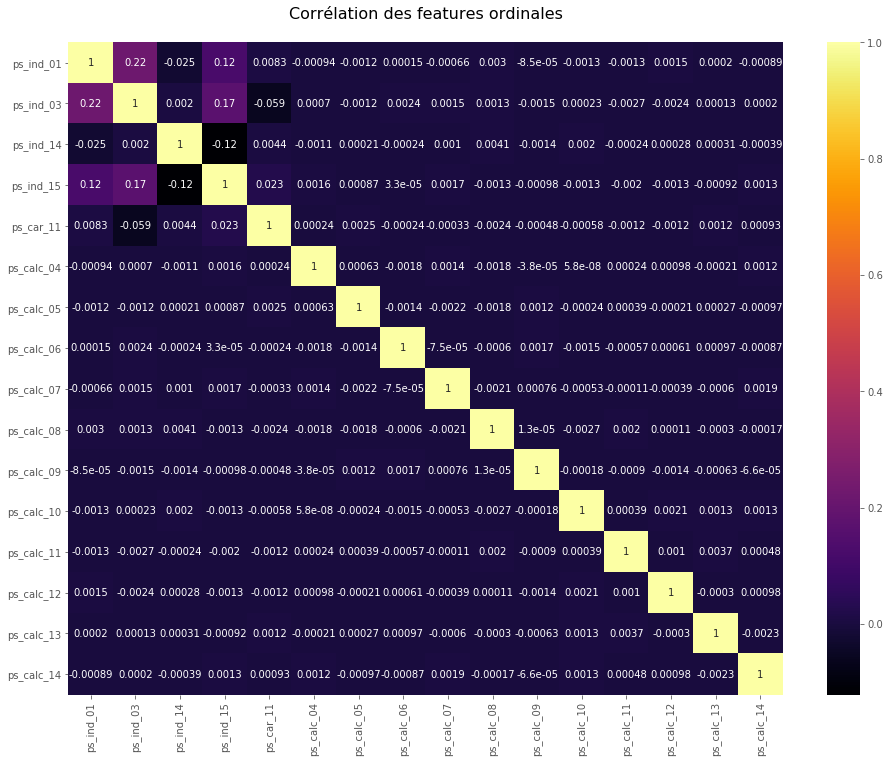

In [80]:
correlation_features('ordinales', ord_featnames, donnees)

Observation

### Distribution des features

#### Catégorielles

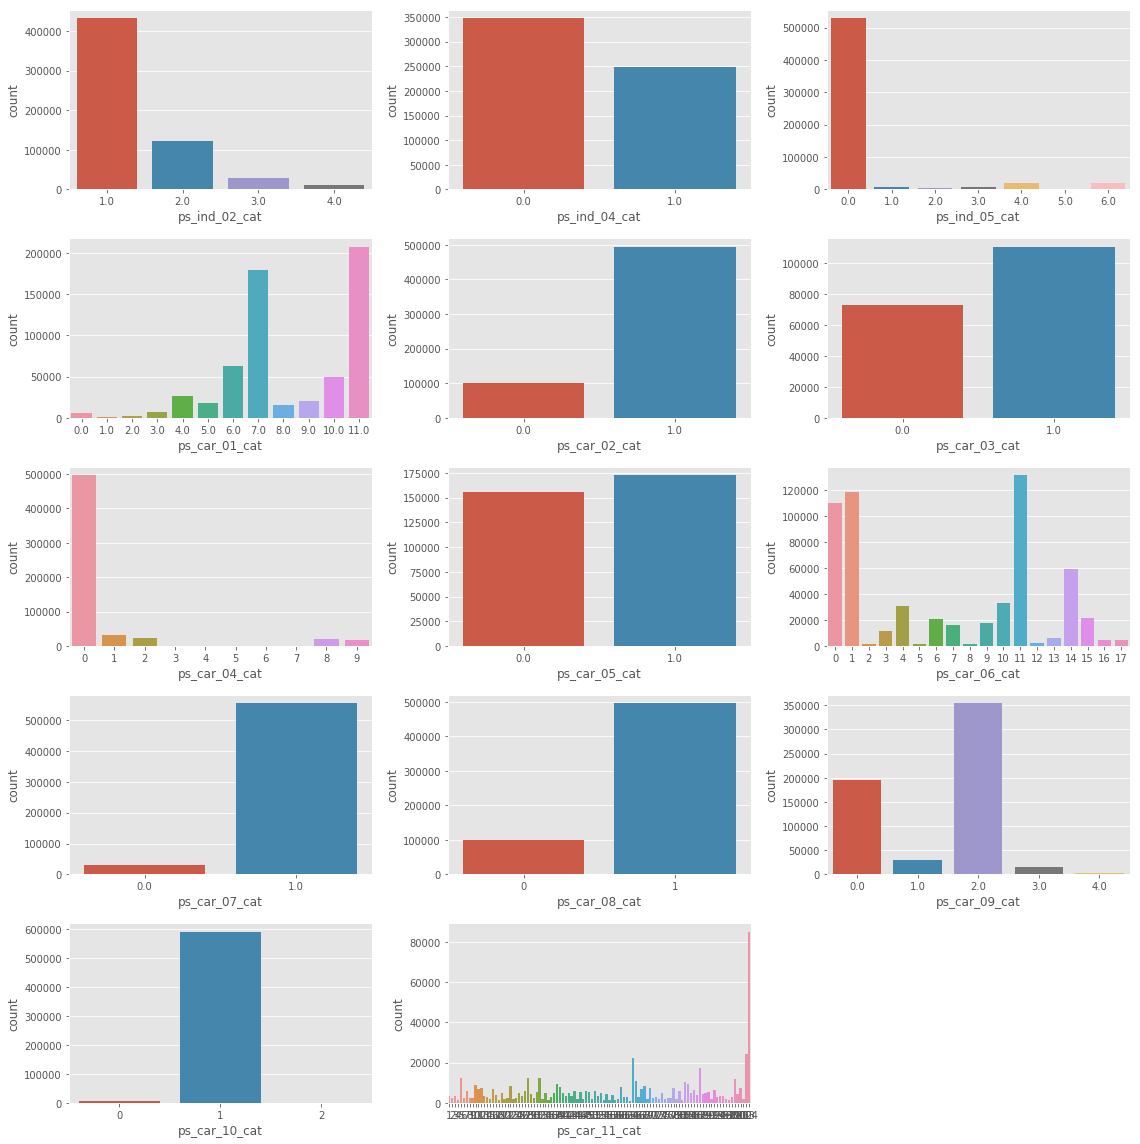

In [81]:
fig , axes = plt.subplots(nrows=5,ncols=3,figsize=(16,16))
for i , colname in enumerate(cat_featnames):
    sns.countplot(colname,data=donnees[cat_featnames],ax=fig.axes[i])
plt.tight_layout()
fig.delaxes(axes[4][2])

#### Binaires

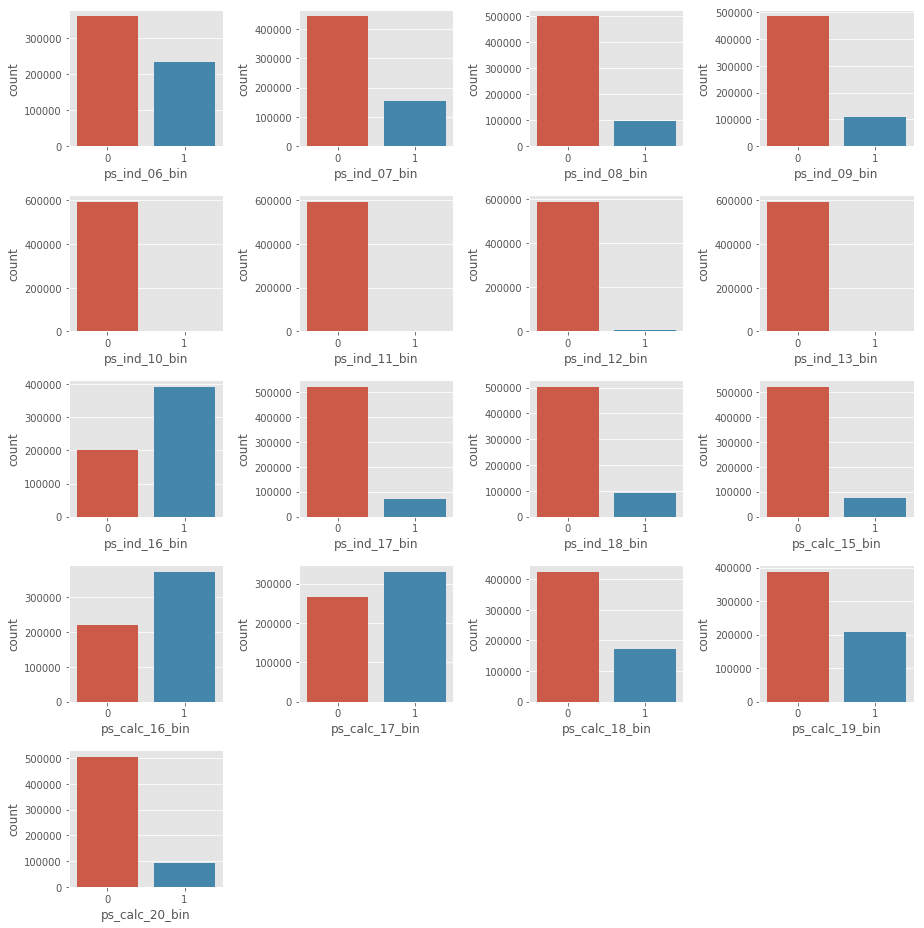

In [82]:
fig , axes = plt.subplots(nrows=5,ncols=4,figsize=(13,13))
for i , colname in enumerate(bin_featnames):
    sns.countplot(colname,data=donnees[bin_featnames],ax=fig.axes[i])
plt.tight_layout()
for i in range(1,4):
    fig.delaxes(axes[4][i])

#### Continues

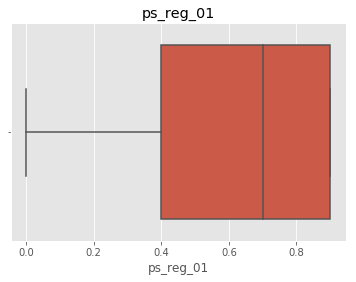

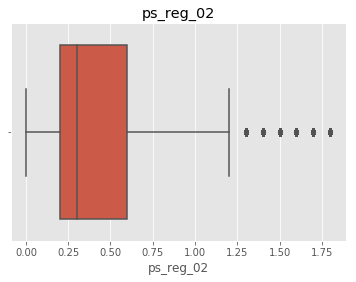

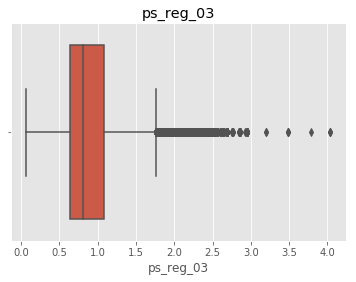

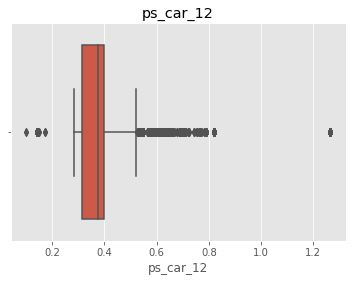

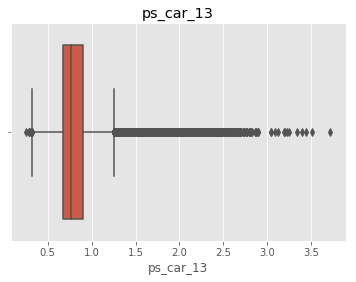

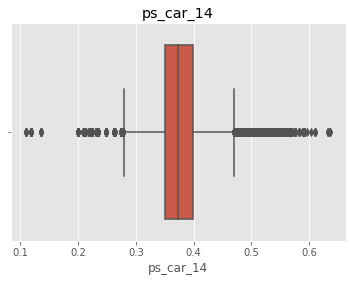

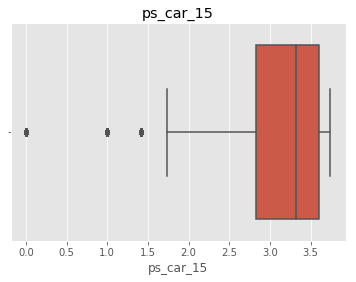

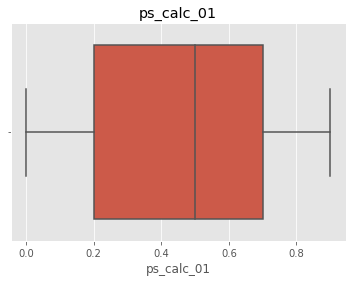

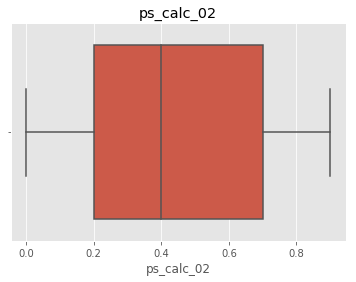

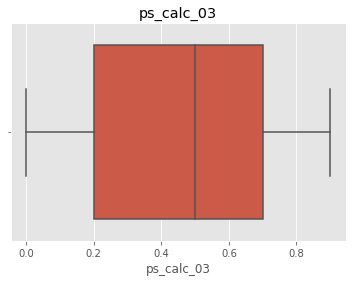

In [83]:
compt=0
for i, colname in enumerate(cont_featnames):
    plt.figure(compt)
    sns.boxplot(x=colname, 
                #hue='target', 
                data=donnees)
    plt.title(colname)
    compt+=1

#### Ordinales

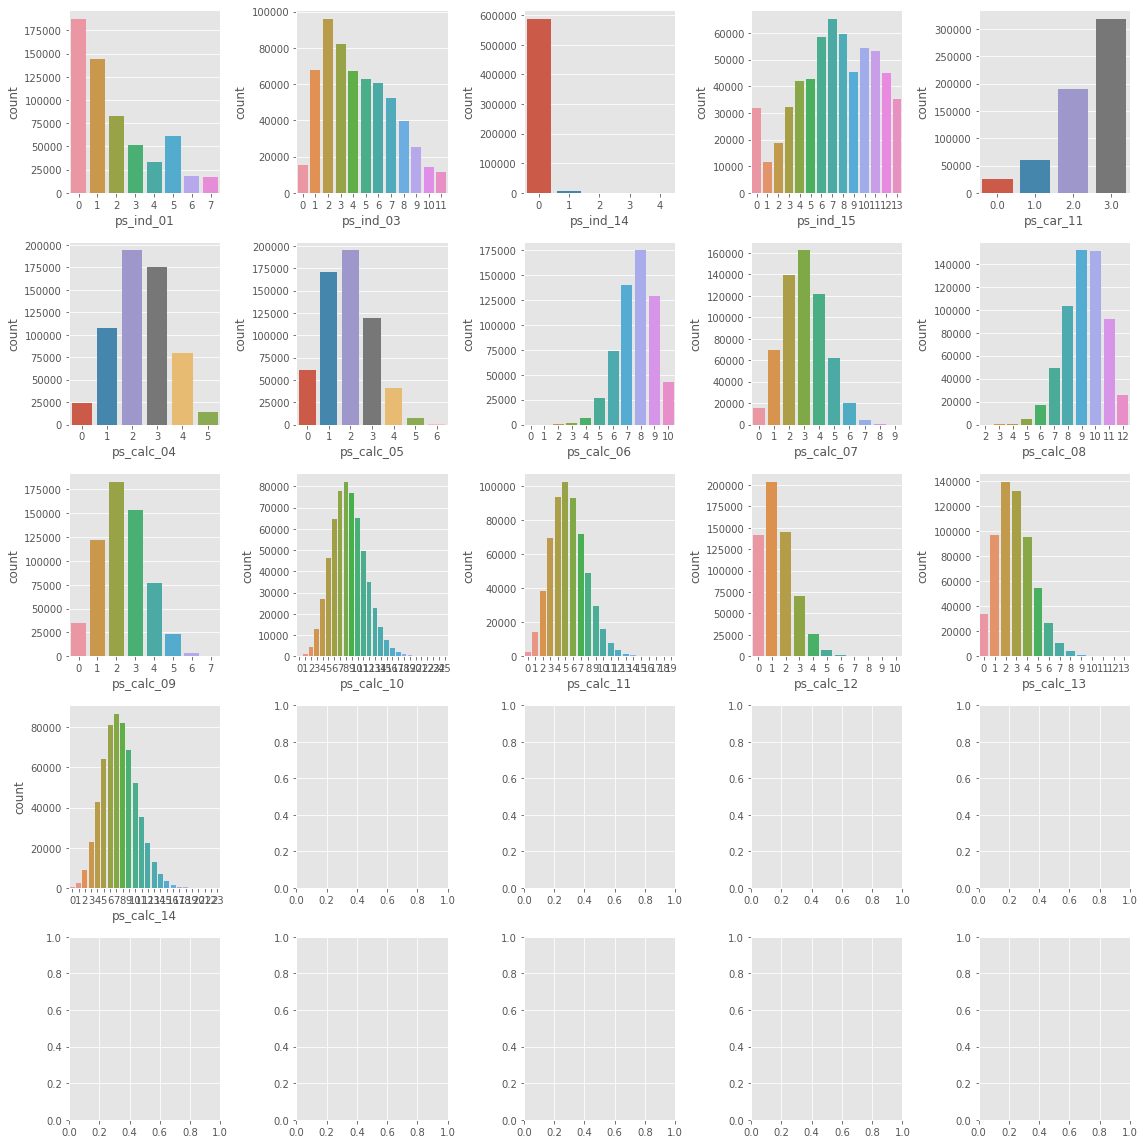

In [84]:
fig , axes = plt.subplots(nrows=5,ncols=5,figsize=(16,16))
for i , colname in enumerate(ord_featnames):
    sns.countplot(colname,data=donnees[ord_featnames],ax=fig.axes[i])
plt.tight_layout()
#fig.delaxes(axes[4][2])

<a id='preprocess'></a>
# II. Préparation des données pour l'entraînement des classifieurs  

[Retourner au sommaire](#toc)<br>

## 1) Suppression de features 

Les features ps_car_03_cat, ps_car_05_cat et ps_reg_03 ont trop de valeurs manquantes. On va donc les supprimer :

In [85]:
donnees.drop(['ps_car_03_cat','ps_car_05_cat','ps_reg_03'], axis=1, inplace=True)
donnees_test.drop(['ps_car_03_cat','ps_car_05_cat','ps_reg_03'], axis=1, inplace=True)
cont_featnames.remove('ps_reg_03')
cat_featnames.remove('ps_car_03_cat')
cat_featnames.remove('ps_car_05_cat')

In [86]:
###On supprime également la colonne id (à cause de sa valeur prédictive nulle) :

In [87]:
#donnees.drop(['id'],axis=1, inplace=True)
#donnees_test.drop(['id'],axis=1, inplace=True)

In [88]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 56 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [89]:
donnees_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 55 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892509 non-null float64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892671 non-null float64
ps_ind_05_cat     884106 non-null float64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_car_01_cat     892656 non-null float

In [90]:
#On a retiré des données, donc la liste des indices de la dataframe n'est plus contigue. 
#On réinitialise cette liste :
donnees.index

RangeIndex(start=0, stop=595212, step=1)

In [91]:
donnees_test.index

RangeIndex(start=0, stop=892816, step=1)

In [92]:
donnees.reset_index(inplace=True, drop=True)

In [93]:
donnees_test.reset_index(inplace=True, drop=True)

In [94]:
donnees.index

RangeIndex(start=0, stop=595212, step=1)

In [95]:
donnees_test.index

RangeIndex(start=0, stop=892816, step=1)

On remplace maintenant les données manquantes des autres features :
* Pour les features binaires, catégorielles et ordinales,  vu qu'il s'agit de valeurs entières, on choisit de les remplacer par la valeur la plus rencontrée dans la colonne
* Pour les features continues, on les remplace par la moyenne des valeurs de la colonne

In [96]:
val_manquantes2=donnees.columns[donnees.isna().any()].tolist()
val_manquantes2

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [97]:
val_manquantes_test2=donnees_test.columns[donnees_test.isna().any()].tolist()
val_manquantes_test2

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_14']

In [98]:
bin_featnames + cat_featnames + ord_featnames

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_car_11',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [99]:
donnees.isna().sum().sum()

60904

In [100]:
donnees_test.isna().sum().sum()

91341

In [101]:
#donnees2=donnees

for c in (bin_featnames + cat_featnames + ord_featnames):
    donnees[c].fillna(value=donnees[c].mode()[0], inplace=True)
    donnees_test[c].fillna(value=donnees_test[c].mode()[0], inplace=True)
    
for c in cont_featnames:
    donnees[c].fillna(value=donnees[c].mean(), inplace=True)
    donnees_test[c].fillna(value=donnees_test[c].mean(), inplace=True)       

In [102]:
donnees.isna().sum().sum()

0

In [103]:
donnees_test.isna().sum().sum()

0

## 2) Encodage des données catégorielles 
[Retourner au sommaire](#toc)<br>

In [104]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

donnees = pd.get_dummies(donnees, columns=cat_featnames)

In [105]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Columns: 215 entries, id to ps_car_11_cat_104
dtypes: float64(10), int64(34), uint8(171)
memory usage: 296.9 MB


## 3) Centrage et réduction des variables continues 

In [106]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# standardization of non categorical features

scaler = StandardScaler()
X_train = scaler.fit_transform(donnees.drop(['id','target'], axis=1))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<a id='traintest'></a>
# III. Entraînement et tests
[Retourner au sommaire](#toc)<br>

## 1) ACP

In [144]:
y_train = donnees['target'].values.astype(np.int8)

from sklearn.decomposition import PCA

target_names = np.unique(y_train)
n_components=175

#ACP
pca = PCA(n_components=n_components, svd_solver='full', random_state=2018)
X_pca = pca.fit_transform(X_train)

#Variance Expliquée
print('Variance expliquée: %.4f' % pca.explained_variance_ratio_.sum())
n = 20
print('Contributions individuelles à la variance  (pour les ' + str(n) + ' premières composantes):')
for j in range(n):
    print(pca.explained_variance_ratio_[j])


#instanciation
#acp = PCA(svd_solver = 'full')

#coord = acp.fit_transform(X_cont)

#print(acp.n_components_)
#len(coord)

Variance expliquée: 0.9997
Contributions individuelles à la variance  (pour les 20 premières composantes):
0.19220468952660122
0.1224787758163799
0.109518253820818
0.103723514331296
0.07900594277813892
0.052468982549794416
0.04170118308930907
0.030932371132644063
0.029046785985139663
0.025846929955439257
0.02257266004386259
0.02100729632798937
0.01869862527794171
0.018119218236640505
0.01192360406621656
0.009684601866823373
0.007769571572759398
0.006814069822652989
0.0058325526678857445
0.004730840272618198


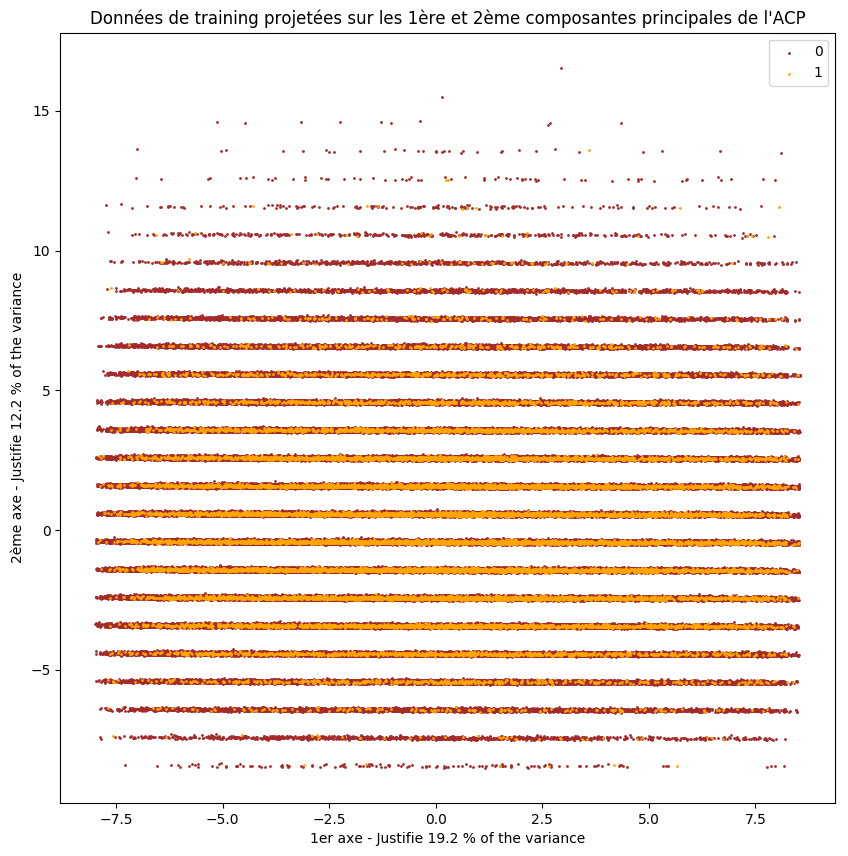

In [145]:
#Plot
plt.figure(1, figsize=(10, 10))
colors = ['brown', 'orange']
for i in target_names:
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], color=colors[i], s=1, label=i)
plt.legend()
plt.title("Données de training projetées sur les 1ère et 2ème composantes principales de l'ACP")
plt.xlabel("1er axe - Justifie %.1f %% of the variance" % (pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("2ème axe - Justifie %.1f %% of the variance" % (pca.explained_variance_ratio_[1] * 100.0))

    
plt.show()

## 1) Régression logistique

### a)	Séparation en train et test

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

X=donnees.drop(['id','target'], axis=1)
y=target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

### b)	Cross-validation du niveau de pénalisation

In [115]:
#Lancement de la régression avec cross validation pour choix de la pénalisation
logreg_cv = LogisticRegressionCV(penalty='l2', class_weight='liblinear',
                                 Cs=np.logspace(-3, 7, 10),
                                 cv=3, max_iter=1000, n_jobs=4)
logreg_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000e-03, 1.29155e-02, 1.66810e-01, 2.15443e+00, 2.78256e+01,
       3.59381e+02, 4.64159e+03, 5.99484e+04, 7.74264e+05, 1.00000e+07]),
           class_weight='liblinear', cv=3, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='warn',
           n_jobs=4, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### c) Courbe ROC

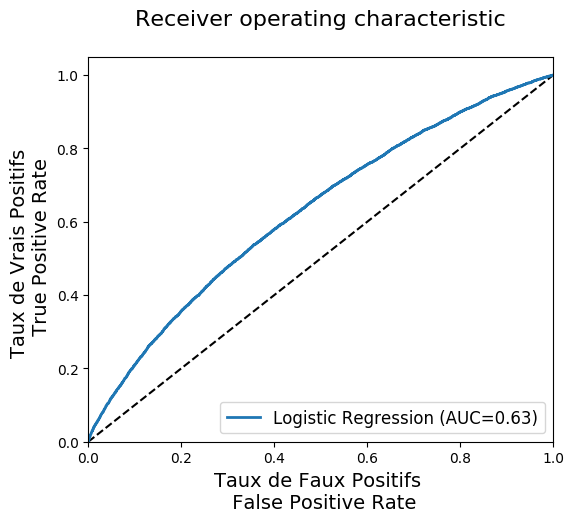

In [138]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score

fpr, tpr, _ = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.style.use('default')
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="Logistic Regression (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs \n False Positive Rate', fontsize=14)
plt.ylabel('Taux de Vrais Positifs \n True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic\n', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

## 2)	Comparaison d'autres classifieurs via les mesures d'erreur

### a)	Modèles

In [129]:
#from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

clfs = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    #SVC(probability=True),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    LogisticRegression()
]

aucs = []
fprs = []
tprs = []
precisions = []
recalls = []
f1_scores = []


for clf in clfs:
    print(clf.__class__.__name__)
    clf.fit(X_train, y_train)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])    
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc(fpr, tpr))
    
    
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score(y_test, clf.predict(X_test)))  

RandomForestClassifier


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GradientBoostingClassifier
DecisionTreeClassifier
ExtraTreeClassifier
LogisticRegression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### b)	Courbe ROC

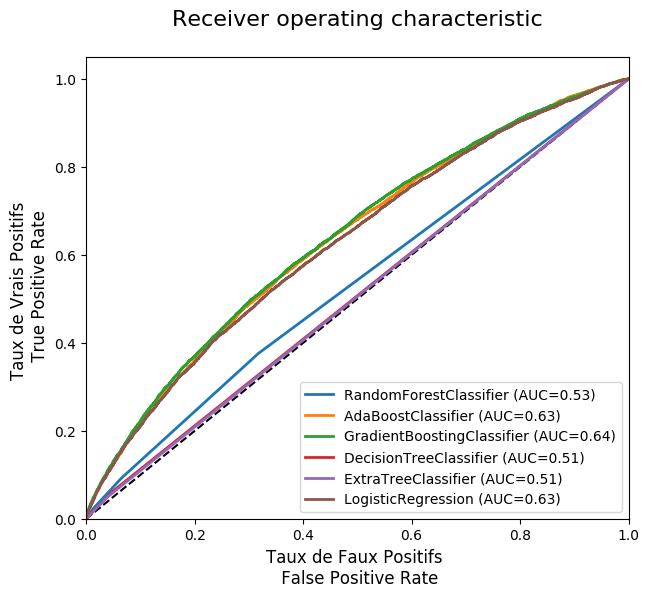

In [135]:
names = [clf.__class__.__name__ for clf in clfs]

plt.figure(figsize=(7, 6))
plt.plot([0, 1], [0, 1], 'k--')

for fpr, tpr, auc, name in zip(fprs, tprs, aucs, names):
    plt.plot(fpr, tpr, label=name + ' (AUC=%.2f)' % auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs \n False Positive Rate', fontsize=12)
plt.ylabel('Taux de Vrais Positifs \n True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic\n', fontsize=16)
plt.legend(loc="lower right", fontsize=10)


### c)	Courbe Precision-Recall

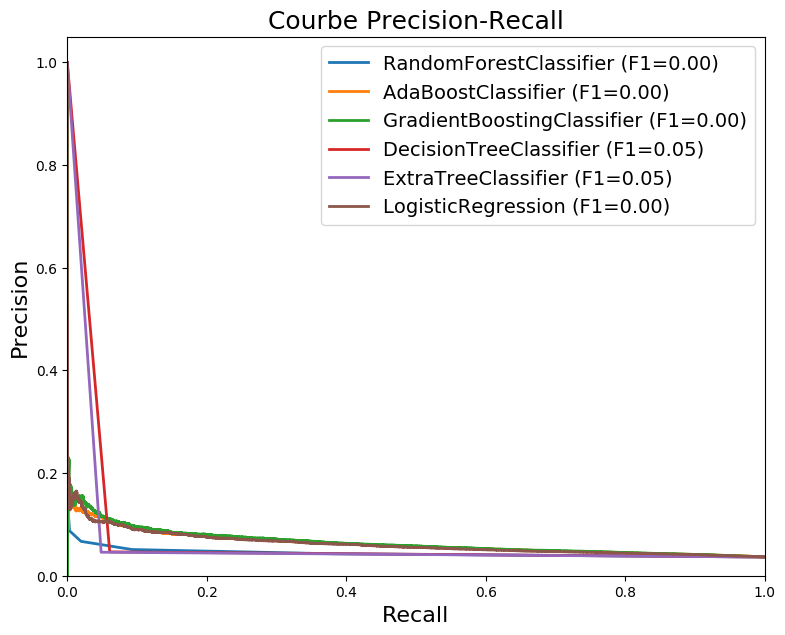

In [140]:
plt.figure(figsize=(9, 7))

for precision, recall, f1_score, name in zip(precisions, recalls, f1_scores, names):
    plt.plot(recall, precision, label=name + ' (F1=%.2f)' % f1_score, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Courbe Precision-Recall', fontsize=18)
plt.legend(loc="upper right", fontsize=14)

## 3) Feature Engineering

### a)	Suppression des features avec variance très faible ou nulle

### b) Sélection de Features

In [132]:
#from sklearn.ensemble import RandomForestClassifier

X_train = X
y_train = y

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, class_weight='balanced')

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))
    
from sklearn.feature_selection import SelectFromModel
s = SelectFromModel(rf, threshold='median', prefit=True)

selected_vars = list(feat_labels[s.get_support()])

donnees_NEW = donnees[selected_vars + ['target']]
donnees_NEW.shape

donnees_NEW.columns

 1) ps_car_13                      0.054144
 2) ps_car_14                      0.040428
 3) ps_calc_10                     0.034423
 4) ps_calc_14                     0.033561
 5) ps_ind_15                      0.033174
 6) ps_ind_03                      0.032386
 7) ps_reg_02                      0.032351
 8) ps_calc_01                     0.031829
 9) ps_calc_02                     0.031775
10) ps_calc_03                     0.031573
11) ps_calc_11                     0.031400
12) ps_calc_13                     0.027361
13) ps_car_15                      0.027082
14) ps_reg_01                      0.026468
15) ps_calc_08                     0.025632
16) ps_calc_07                     0.025426
17) ps_calc_06                     0.024340
18) ps_ind_01                      0.024054
19) ps_calc_09                     0.023572
20) ps_calc_05                     0.022206
21) ps_calc_04                     0.022111
22) ps_calc_12                     0.021955
23) ps_car_12                   

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin',
       ...
       'ps_car_11_cat_78', 'ps_car_11_cat_82', 'ps_car_11_cat_83',
       'ps_car_11_cat_85', 'ps_car_11_cat_87', 'ps_car_11_cat_99',
       'ps_car_11_cat_101', 'ps_car_11_cat_103', 'ps_car_11_cat_104',
       'target'],
      dtype='object', length=108)